In [1]:
import numpy as np 
import pandas as pd
import torch
import matplotlib.pyplot as plt 
import math
from tqdm import tqdm

In [2]:
file_path = "/media/lars/F77E-7D07/"
unique_pairs = pd.read_csv(file_path + "unique_pairs.csv")
#unique_pairs = unique_pairs[~(unique_pairs["pmi"] == -np.inf)]

In [9]:
sorted = unique_pairs.sort_values("total_recs")

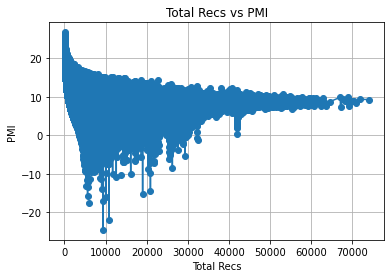

In [10]:
plt.plot(np.array(sorted["total_recs"]), np.array(sorted["pmi"]), marker='o')
plt.xlabel("Total Recs")
plt.ylabel("PMI")
plt.title("Total Recs vs PMI")
plt.grid(True)
plt.show()

In [3]:
unique_pairs["pmi"] = unique_pairs["pmi"] - (-2 * np.log2(unique_pairs["pmi"]))

/home/lars/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
unique_pairs[(unique_pairs["title_1"] == "Portal") & (unique_pairs["positive_reviews_2"] >= 100)].dropna().sort_values("pmi")

,app_id_1,title_1,app_id_2,title_2,Combined,positive_reviews_1,positive_reviews_2,pmi,total_recs
2638358,400,Portal,1094520,Sands of Salzaar,2.0,13049,599,-2.663779,14115
2637107,400,Portal,1527950,Wartales,3.0,13049,825,-1.674485,14305
2638518,400,Portal,1324130,Stranded: Alien Dawn,1.0,13049,272,-1.564057,13659
2637263,400,Portal,784080,MechWarrior 5: Mercenaries,3.0,13049,771,-1.037084,14280
2638342,400,Portal,1072040,Panzer Corps 2,1.0,13049,237,-0.384111,13599
...,...,...,...,...,...,...,...,...,...
2637611,400,Portal,2640,Call of Duty: United Offensive,58.0,13049,242,11.925698,13589
2636336,400,Portal,48000,LIMBO,530.0,13049,1982,12.152801,15578
2637167,400,Portal,620,Portal 2,7355.0,13049,27043,12.187779,40740
2638134,400,Portal,684410,Bridge Constructor Portal,163.0,13049,549,12.368286,13914


In [11]:
unique_pairs.to_csv(file_path + "unique_pairs.csv")